In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_paths = 5
PATH_LENGTH = 500
BARRIER = 400
paths = np.cumsum(np.random.randn(PATH_LENGTH,n_paths),axis = 0)

## GOAL
Estimating the continuation value at a certain time ($x_0$-value) for a certain $y_0$-value given by the current $y$-value of a specific path.

### Approach 1
Use the single continued path of the current path to get an estimate of the continuation value.
- low accuracy
- low computational cost

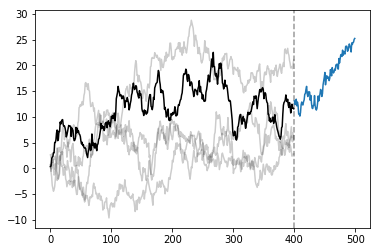

In [3]:
ax = plt.gca()
ax.plot(paths[:BARRIER,0],c='k')
ax.plot(paths[:BARRIER,1:],c='k',alpha=0.2)
ax.axvline(x=BARRIER,ls='--',alpha=0.4,c='k')
ax.plot(range(BARRIER,PATH_LENGTH),paths[BARRIER:,0])
plt.show()

### Approach 2
Conduct a nested Monte-Carlo simmulation starting from the current $x_0,y_0$ pair of the path under consideration. This way all the single paths of the nested simulation yield poor estimates, for the desired continuation value at $y_0.$ These are combined in the usual Monte-Carlo way into a good estimate for the continuation value at $y_0$ using a the *mean* of the poor single path estimates.
- high accuracy
- high computational cost

In [4]:
nested_paths = paths[BARRIER-1,0] + np.cumsum(np.random.randn(PATH_LENGTH-BARRIER,n_paths),axis=0)

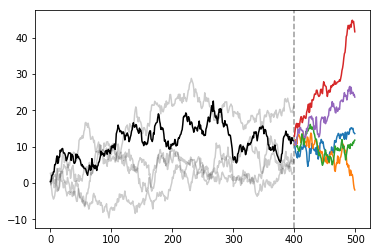

In [5]:
ax = plt.gca()
ax.plot(paths[:BARRIER,0],c='k')
ax.plot(paths[:BARRIER,1:],c='k',alpha=0.2)
ax.axvline(x=BARRIER,ls='--',alpha=0.4,c='k')
ax.plot(range(BARRIER,PATH_LENGTH),nested_paths)
plt.show()

### Approach 3

The Longstaff-Schwartz approach exploits all the other simulated paths as follows.
Using other simulated paths we have several poor single path estimates for the continuation value at out desired time $x_0$. These estimates are however at different values of $y$. Assuming that the continuation value varies continuously with $y$ we can use a *regression* to  estimate the continuation value as a function of $y$. This in turn gives us an estimate for the continuation value at $y_0$ (and for the continuation value of all $y$-values).
- good accuracy
- moderate computational cost

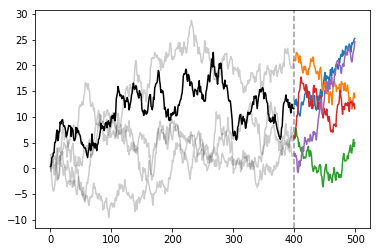

In [6]:
ax = plt.gca()
ax.plot(paths[:BARRIER,0],c='k')
ax.plot(paths[:BARRIER,1:],c='k',alpha=0.2)
ax.axvline(x=BARRIER,ls='--',alpha=0.4,c='k')
ax.plot(range(BARRIER,PATH_LENGTH),paths[BARRIER:,:])
plt.show()

### Summary
- Several poor estimates same $y_0$ + *mean* $\to$ good estimate at $y_0$
- Several poor estimates for differnt $y$ + *regression* $\to$ good estimates at all $y$s